In [52]:
###########################################################################################################################################################
# 
#   https://seaborn.pydata.org/index.html
# 
#
#
#
#
###########################################################################################################################################################

## Imports

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Variables

In [83]:
x_values = np.random.uniform(0, 1, 500)
y_values = x_values + np.random.normal(1, 0.1, 500)

theta0 = 0
theta1 = 0

# learning_rates from 0.01 to 0.1
learning_rates = np.arange(1, 11) * 0.01

df = pd.DataFrame(np.array([x_values, y_values]).T, columns=['x', 'y'])
df['costfunction_y'] = np.ones(len(x_values))
df['derivative_m'] = np.ones(len(x_values))
df['derivative_b'] = np.ones(len(x_values))

df.head()

,x,y,costfunction_y,derivative_m,derivative_b
0,0.622972,1.571671,1.0,1.0,1.0
1,0.812262,1.787159,1.0,1.0,1.0
2,0.884829,1.841198,1.0,1.0,1.0
3,0.119643,1.162114,1.0,1.0,1.0
4,0.657786,1.495048,1.0,1.0,1.0


## Visualize Datapoints

<AxesSubplot:>

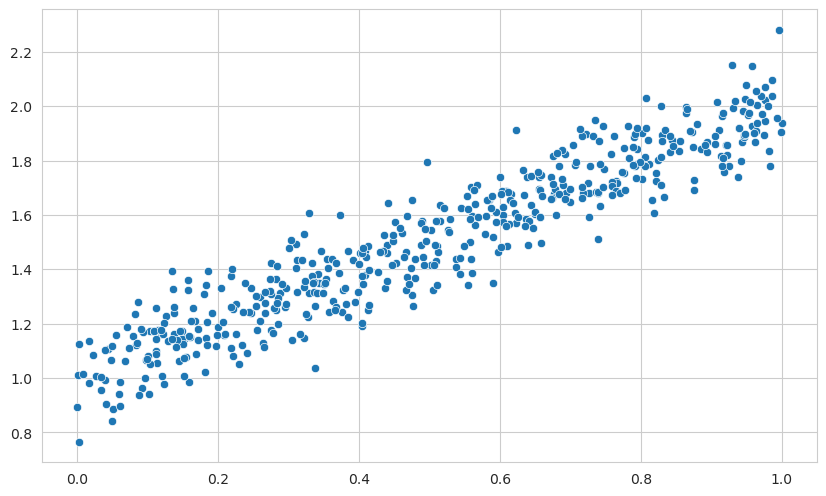

In [84]:
plt.figure(figsize=(10, 6), dpi=100)
sns.scatterplot(data=df, x=x_values, y=y_values)

## Functions

In [88]:
def y_prediction(theta0, theta1):
    return theta1 * x_values + theta0

def costfunction(theta0, theta1):
    y_predicted = y_prediction(theta0, theta1)
    return np.mean((y_values - y_predicted) ** 2)

def update_weights(theta0, theta1, x, y, alpha=0.01):
    n = len(x)
    derivative_theta0 = (-2 / n) * np.sum(y - theta0 - theta1 * x)
    derivative_theta1 = (-2 / n) * np.sum((y - theta0 - theta1 * x) * x)
    
    theta0 = theta0 - alpha * derivative_theta0
    theta1 = theta1 - alpha * derivative_theta1
    
    return theta1, theta0 

## Visualize change of the costfunction over time, learning rate dependent

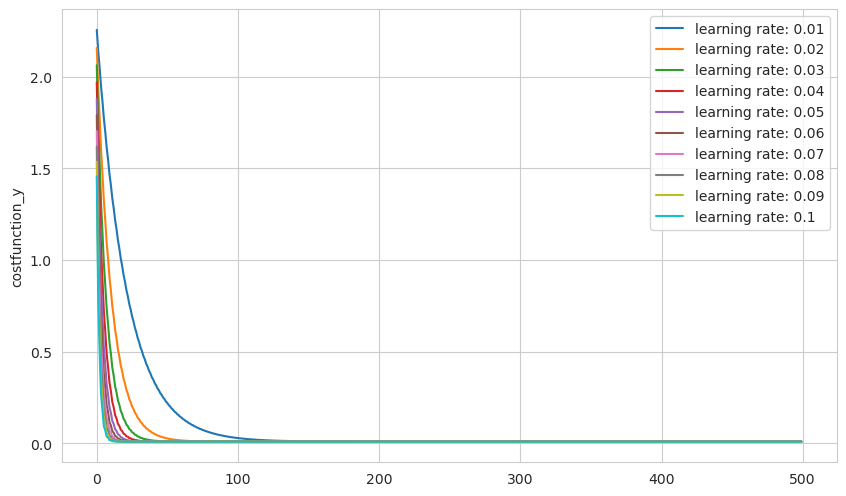

In [89]:
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style('whitegrid')

for i in range(len(learning_rates)):
    theta1, theta0 = 0, 0
    for j in range(len(df)):
        theta1, theta0 = update_weights(theta1, theta0, x_values, y_values, learning_rates[i])
        df['costfunction_y'].iloc[j] = costfunction(theta1, theta0)

    sns.lineplot(data=df, x=np.arange(len(df)), y='costfunction_y', label=f'learning rate: {learning_rates[i]}')
    
plt.legend()

## Visualize change of the derivatives over interations, learning rate dependent

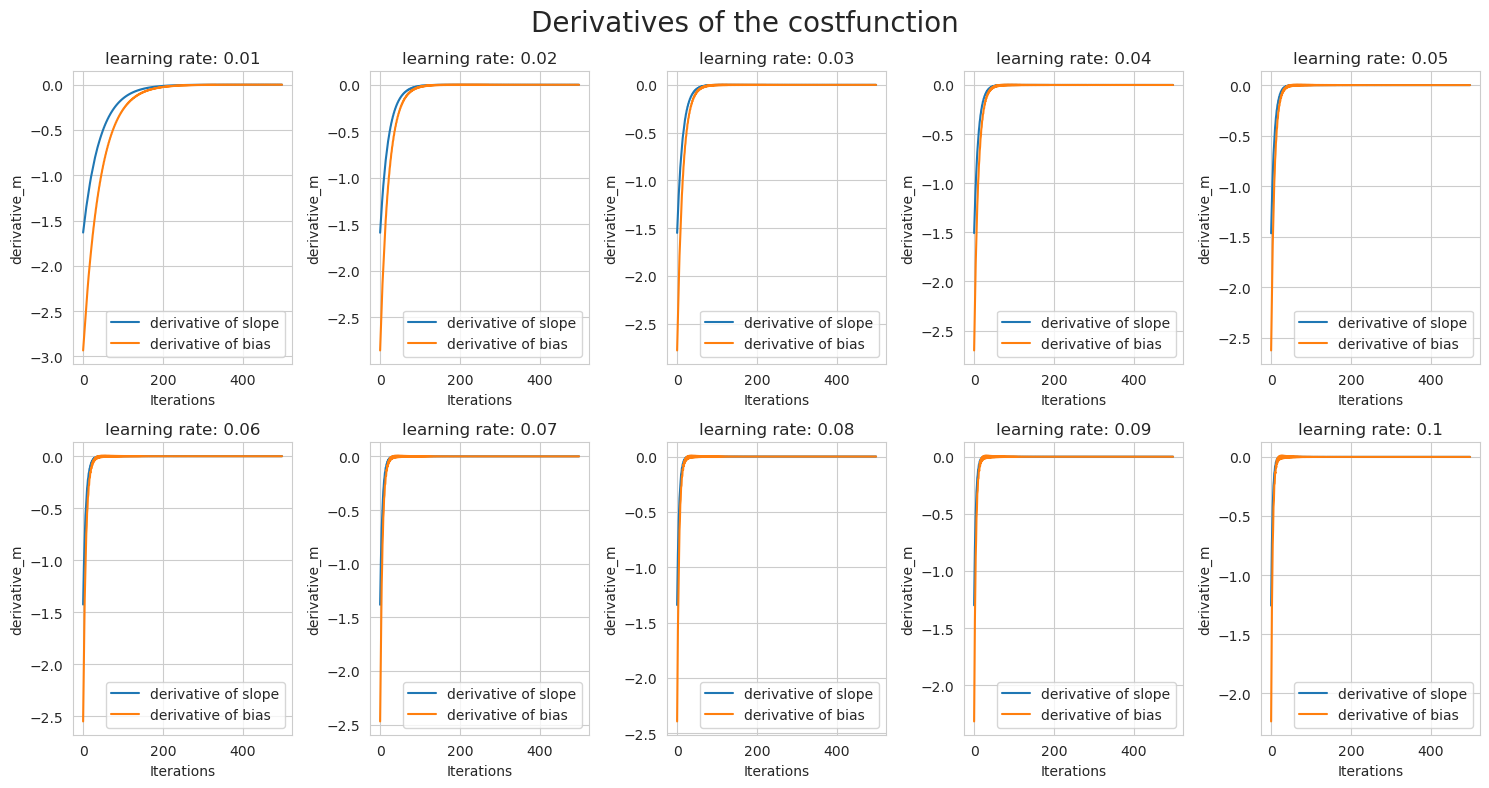

In [90]:
fig, axes = plt.subplots(nrows=2, ncols= 5, figsize=(15, 8), dpi=100)

fig.suptitle('Derivatives of the costfunction', fontsize=20)

sns.set_style('whitegrid')

for i in range(len(learning_rates)):
    theta1, theta0 = 0, 0
    for j in range(len(df)):
        theta1, theta0 = update_weights(theta1, theta0, x_values, y_values, learning_rates[i])
        df['derivative_m'].iloc[j] = (-2 / len(x_values)) * np.sum(y_values * x_values - theta0 * x_values - theta1 * (x_values ** 2))
        df['derivative_b'].iloc[j] = (-2 / len(x_values)) * np.sum(y_values - theta0 - theta1 * x_values)

    axes[0 if i < 5 else 1, i % 5].set_xlabel('Iterations')
    axes[0 if i < 5 else 1, i % 5].set_title(f'learning rate: {learning_rates[i]}')
    
    sns.lineplot(data=df, x=np.arange(len(df)), y='derivative_m', ax=axes[0 if i < 5 else 1, i % 5], label='derivative of slope')
    sns.lineplot(data=df, x=np.arange(len(df)), y='derivative_b', ax=axes[0 if i < 5 else 1, i % 5], label='derivative of bias')
    
plt.tight_layout()

In [92]:
""" fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6), dpi=100)

fig.suptitle('Density function of 0.1 learning rate for the derivative of the costfunction', fontsize=20)
axes[0, 0].set_title('derivative of the slope')
axes[0, 1].set_title('derivative of the bias')
axes[1, 0].set_title('derivative of the slope')
axes[1, 1].set_title('derivative of the bias')

sns.kdeplot(data=df, x='derivative_m', ax=axes[0, 0], shade=True)
sns.kdeplot(data=df, x='derivative_b', ax=axes[0, 1], shade=True)

sns.violinplot(data=df, x='derivative_m', ax=axes[1, 0], shade=True)
sns.violinplot(data=df, x='derivative_b', ax=axes[1, 1], shade=True)

plt.tight_layout() """

" fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6), dpi=100)\n\nfig.suptitle('Density function of 0.1 learning rate for the derivative of the costfunction', fontsize=20)\naxes[0, 0].set_title('derivative of the slope')\naxes[0, 1].set_title('derivative of the bias')\naxes[1, 0].set_title('derivative of the slope')\naxes[1, 1].set_title('derivative of the bias')\n\nsns.kdeplot(data=df, x='derivative_m', ax=axes[0, 0], shade=True)\nsns.kdeplot(data=df, x='derivative_b', ax=axes[0, 1], shade=True)\n\nsns.violinplot(data=df, x='derivative_m', ax=axes[1, 0], shade=True)\nsns.violinplot(data=df, x='derivative_b', ax=axes[1, 1], shade=True)\n\nplt.tight_layout() "

In [ ]:
x = []
y = []

